In [16]:
from collections import Counter  # For counting words
from pprint import pprint
from dateutil import parser

import ast  # Interpret string as Python command
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
# Reading the data
data = pd.read_csv('../data/train.csv')
export = data.copy()

## Overview

In [18]:
len(data)

3000

In [19]:
list(data.columns)

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue']

In [20]:
print(data.describe())

                id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09


In [21]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Exploring Features

### Budget

In [22]:
print('Number of NAs: {}'.format(len(data[data.budget.isna()])))

Number of NAs: 0


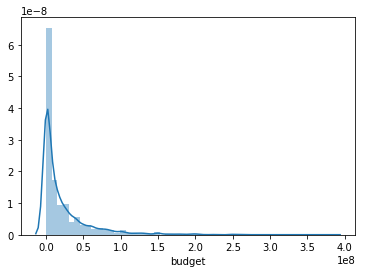

In [23]:
sns.distplot(data.budget)

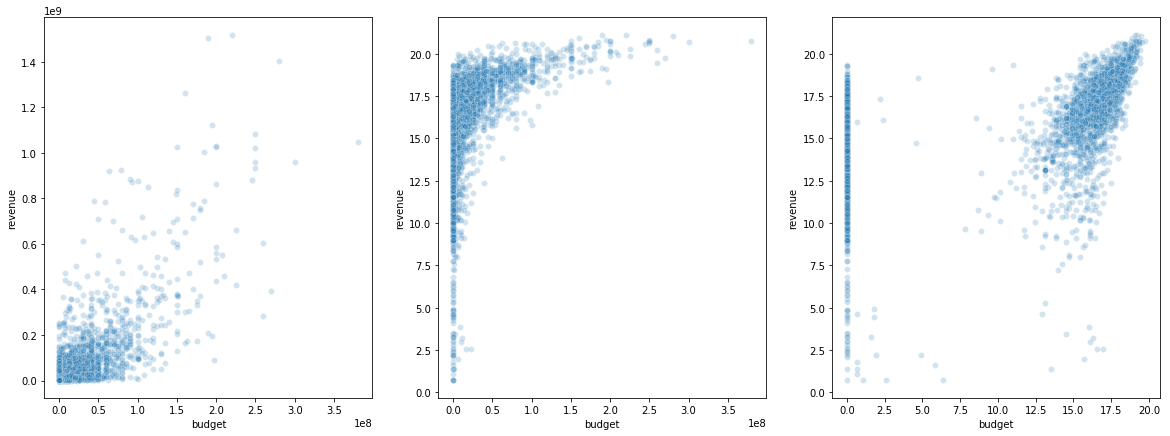

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(20,7))

sns.scatterplot(x='budget', y='revenue', data=data, alpha=.2, ax=axs[0])
sns.scatterplot(x='budget', y=np.log1p(data.revenue), data=data, alpha=.2, ax=axs[1])
sns.scatterplot(x=np.log1p(data.budget), y=np.log1p(data.revenue), data=data, alpha=.2, ax=axs[2])

In [25]:
print('Length of Dataframe: {}'.format(len(data[data.budget == 0])))
data[data.budget == 0].head(3)

Length of Dataframe: 812


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391


### Keywords

In [26]:
print('Number of NAs: {}'.format(len(data[data.Keywords.isna()])))

Number of NAs: 276


In [27]:
print(data.Keywords[0])
print(data.Keywords[1])
print(data.Keywords[2])

[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]


In [28]:
# Function for extracting names out of a keywords list 
# Also replaces spaces by underscores for better further processing
def extract_names(keyword_list):
    if pd.isna(keyword_list):
        return []
    else:
        return list(map(lambda x: x['name'].replace(' ', '_'), ast.literal_eval(keyword_list)))

# Apply above function to get a list of name lists
list_of_name_list = data[data.Keywords.notna()]["Keywords"].map(extract_names, na_action=None).tolist()

# Flatten the list of name lists
list_of_names = [y for x in list_of_name_list for y in x]

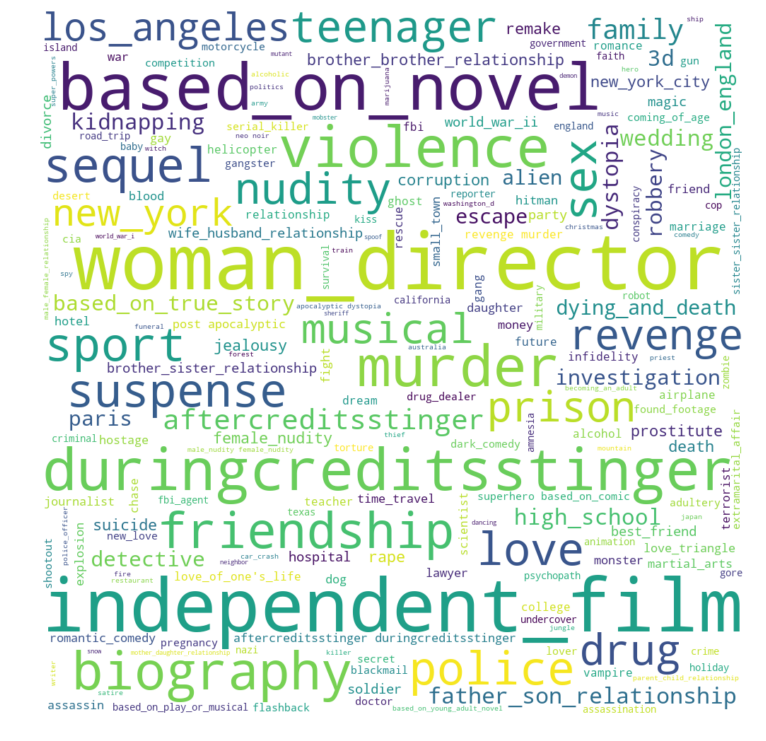

In [29]:
# Create a list of words
text = " ".join(list_of_names)
 
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=5, background_color="white").generate(text)
 
# Display the generated image:
plt.figure(figsize=(27,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<b>TODO</b>: Dafuq!? Warum ist duringcreditsstinger und aftercreditsstinger doppelt?

In [30]:
counter = Counter(list_of_names)
print("Number of keywords: {}".format(len(counter)))
counter.most_common(25)

Number of keywords: 7400


[('woman_director', 175),
 ('independent_film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based_on_novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female_nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high_school', 49),
 ('los_angeles', 48)]

In [31]:
print('{} keywords occur only once in the whole dataset'.format(len([x for (x,y) in counter.items() if y == 1])))

4212 keywords occur only once in the whole dataset


#### Insights from Keywords

* 7400 keywords for 3000 movies (4212 of those occur only once)
* 276 movies do not have any keyword at all
* The amount of keywords per movie differs
* Ideas:    
    * Take only keywords that occur more than x times, rest replace by "other". Replace None by "No keyword"
    * Remove keywords that only occur once
    * Research semantic word clustering and check if applicable here
    * Wiebke: Only take top revenue films and redo analysis below

#### New feature: has_top_keyword

In [32]:
# First: Get pairs of keyword list + revenue for each movie
copy_data = data.copy()
copy_data['Keywords'] = copy_data['Keywords'].map(extract_names, na_action=None)
df = copy_data[['Keywords', 'revenue']]

keywords_df = (
    pd.DataFrame(df.Keywords.values.tolist())
    .stack()
    .reset_index(level=1, drop=True)
    .to_frame('Keywords')
)
df = keywords_df.join(df[['revenue']]).reset_index(drop=True)
print('Length of dataframe: {}'.format(len(df)))
df.head()

Length of dataframe: 21680


,Keywords,revenue
0,time_travel,12314651
1,sequel,12314651
2,hot_tub,12314651
3,duringcreditsstinger,12314651
4,coronation,95149435


In [33]:
# Compute sum and mean revenue for each keyword + count occurences
def f(x):
    d = {}
    d['revenue_sum'] = x['revenue'].sum()
    d['revenue_mean'] = x['revenue'].mean()
    d['keyword_count'] = len(x['revenue'])
    return pd.Series(d, index=['revenue_sum', 'revenue_mean', 'keyword_count'])

df = (df
      .groupby('Keywords')
      .apply(f)
      .sort_values(['revenue_sum', 'revenue_mean'], ascending=False)
      .reset_index()
)

print('Length of dataframe: {}'.format(len(df)))
df.head(10)

Length of dataframe: 7400


,Keywords,revenue_sum,revenue_mean,keyword_count
0,duringcreditsstinger,2.464748e+10,1.839364e+08,134.0
1,aftercreditsstinger,1.632944e+10,2.177259e+08,75.0
2,3d,1.500998e+10,3.752496e+08,40.0
3,superhero,1.399089e+10,4.372154e+08,32.0
4,sequel,1.357501e+10,2.056820e+08,66.0
5,based_on_novel,1.284060e+10,1.156811e+08,111.0
6,based_on_comic,1.259758e+10,3.404750e+08,37.0
7,dystopia,9.848971e+09,1.349174e+08,73.0
8,marvel_comic,8.189464e+09,4.817332e+08,17.0
9,violence,7.146633e+09,8.214520e+07,87.0


In [34]:
# Taking a look at (low count / high revenue)-keywords
perc_thresh = 70
perc = np.percentile(df.revenue_mean, perc_thresh)

tmp = df[(df.revenue_mean >= perc) & (df.keyword_count < 5)]
print('Length of dataframe: {}'.format(len(tmp)))
tmp.head()

Length of dataframe: 1853


,Keywords,revenue_sum,revenue_mean,keyword_count
22,marvel_cinematic_universe,4.413057e+09,1.103264e+09,4.0
35,orcs,3.777159e+09,9.442898e+08,4.0
77,dwarves,2.881343e+09,7.203358e+08,4.0
81,middle-earth_(tolkien),2.818759e+09,9.395864e+08,3.0
88,swashbuckler,2.692583e+09,6.731457e+08,4.0


Movies with keywords that have a high revenue but very low occurence in the dataset are exotics. To be discussed whether to be removed or not.

In [35]:
# Computing the top x most used percent of keywords without the above high_rev/low_count exotics
df = df[df.keyword_count >= 5]
perc_thresh = 70  # chosen so that dataset is balanced
perc = np.percentile(df.revenue_mean, perc_thresh)
print('Length of dataframe: {}'.format(len(df)))
df.head()

Length of dataframe: 996


,Keywords,revenue_sum,revenue_mean,keyword_count
0,duringcreditsstinger,2.464748e+10,1.839364e+08,134.0
1,aftercreditsstinger,1.632944e+10,2.177259e+08,75.0
2,3d,1.500998e+10,3.752496e+08,40.0
3,superhero,1.399089e+10,4.372154e+08,32.0
4,sequel,1.357501e+10,2.056820e+08,66.0


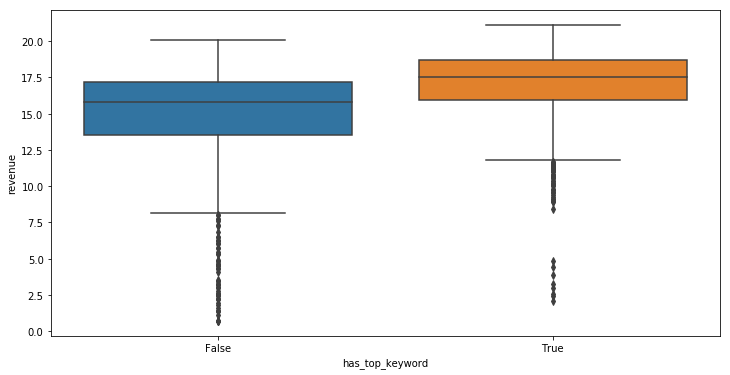

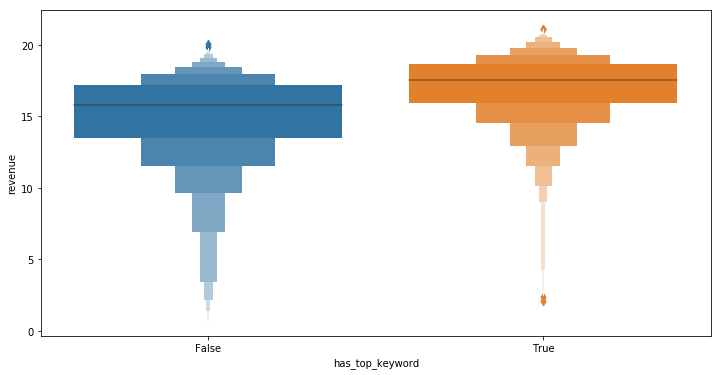

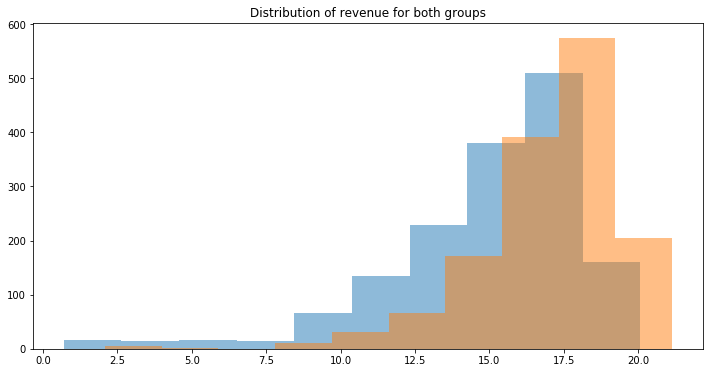

,movies_count,mean_revenue,median_revenue
has_top_keyword,,,
true,1458,109984284.2,40950129.0
false,1542,25823910.0,7253694.5


In [43]:
top_keywords = list(df[df.revenue_mean >= perc].Keywords)

def has_top_keyword(keyword_list, top_keywords):
    if not pd.isna(keyword_list):
        list_of_keywords = extract_names(keyword_list)
        for keyword in list_of_keywords:
            if keyword in top_keywords:
                return True
    return False

copy_data = data.copy()
#copy_data['has_top_keyword'] = copy_data["Keywords"].map(has_top_keyword, na_action=None)
copy_data['has_top_keyword'] = copy_data["Keywords"].apply(has_top_keyword, args=(top_keywords,))

plt.figure(figsize=(12,6))
sns.boxplot(x='has_top_keyword', y=np.log1p(copy_data.revenue), data=copy_data)
plt.show()

plt.figure(figsize=(12,6))
sns.boxenplot(x='has_top_keyword', y=np.log1p(copy_data.revenue), data=copy_data)
plt.show()

plt.figure(figsize=(12,6))
x_not_top = np.log1p(copy_data[copy_data['has_top_keyword'] == False].revenue)
x_top = np.log1p(copy_data[copy_data['has_top_keyword'] == True].revenue)
plt.hist(x=x_not_top, alpha=0.5)
plt.hist(x=x_top, alpha=0.5)
plt.title('Distribution of revenue for both groups')
plt.show()

# Some metrics
nr_no_top_kw = len(copy_data[copy_data['has_top_keyword'] == False])
nr_top_kw = len(copy_data[copy_data['has_top_keyword'] == True])
mean_no_top_kw = round(np.mean(copy_data[copy_data['has_top_keyword'] == False].revenue), 1)
mean_top_kw = round(np.mean(copy_data[copy_data['has_top_keyword'] == True].revenue), 1)
median_no_top_kw = round(np.median(copy_data[copy_data['has_top_keyword'] == False].revenue), 1)
median_top_kw = round(np.median(copy_data[copy_data['has_top_keyword'] == True].revenue), 1)

metrics = {'has_top_keyword': ['true', 'false'], 'movies_count': [nr_top_kw, nr_no_top_kw], 'mean_revenue': [mean_top_kw, mean_no_top_kw], 'median_revenue': [median_top_kw, median_no_top_kw]}
metrics_df = pd.DataFrame(data=metrics)
metrics_df.set_index('has_top_keyword')

In [18]:
export['has_top_keyword'] = export["Keywords"].map(has_top_keyword, na_action=None)

### Release Date

In [19]:
data[['title', 'release_date']].head(10)

,title,release_date
0,Hot Tub Time Machine 2,2/20/15
1,The Princess Diaries 2: Royal Engagement,8/6/04
2,Whiplash,10/10/14
3,Kahaani,3/9/12
4,Marine Boy,2/5/09
5,Pinocchio and the Emperor of the Night,8/6/87
6,The Possession,8/30/12
7,Control Room,1/15/04
8,Muppet Treasure Island,2/16/96
9,A Mighty Wind,4/16/03


--> Problem: Date is encoded as YY

In [93]:
data = pd.read_csv('../data/train.csv')
data[['release_date']] = data['release_date'].map(parser.parse)
data['release_year'] = pd.DatetimeIndex(data['release_date']).year
data['release_month'] = pd.DatetimeIndex(data['release_date']).month_name()
data['release_day'] = pd.DatetimeIndex(data['release_date']).day_name()

# date parser interprets 21 to 68 as 2021 to 2068 --> fix
data.loc[data.release_year >= 2021, 'release_year'] = data.loc[data.release_year >= 2021, 'release_year'] - 100

data[['title', 'release_date', 'release_month', 'release_day']].head()

,title,release_date,release_month,release_day
0,Hot Tub Time Machine 2,2015-02-20,February,Friday
1,The Princess Diaries 2: Royal Engagement,2004-08-06,August,Friday
2,Whiplash,2014-10-10,October,Friday
3,Kahaani,2012-03-09,March,Friday
4,Marine Boy,2009-02-05,February,Thursday


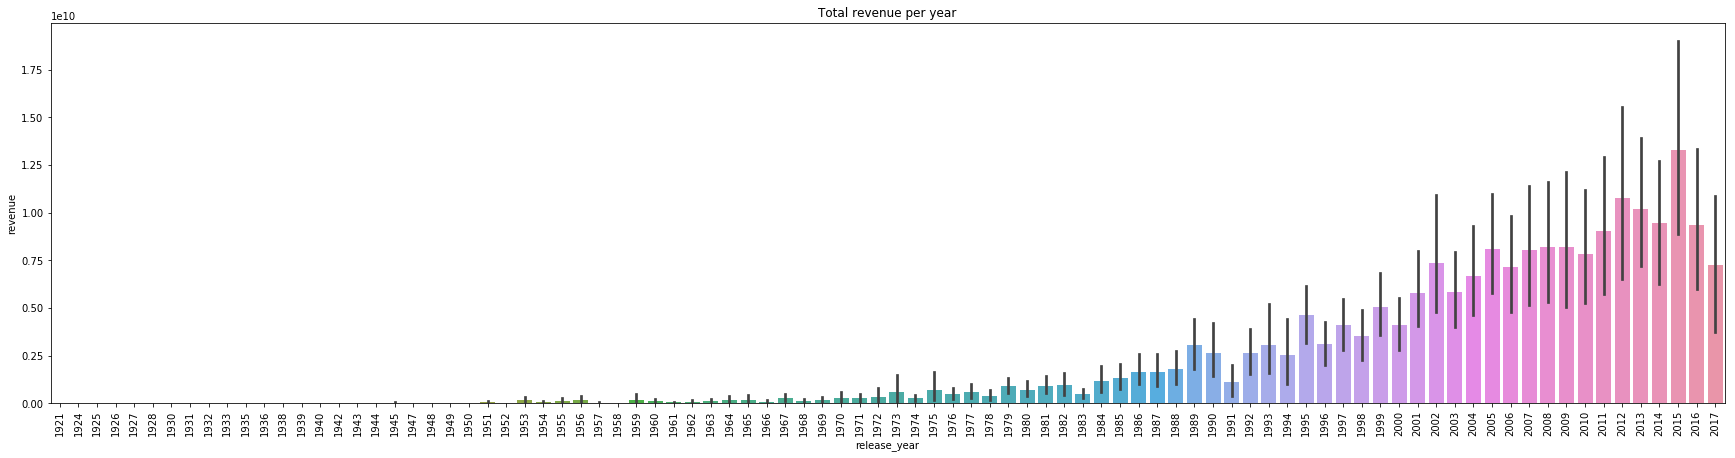

In [94]:
plt.figure(figsize=(30,7))
plt.xticks(rotation='vertical')
plt.title('Total revenue per year')
sns.barplot(x='release_year', y='revenue', data=data, estimator=np.sum)

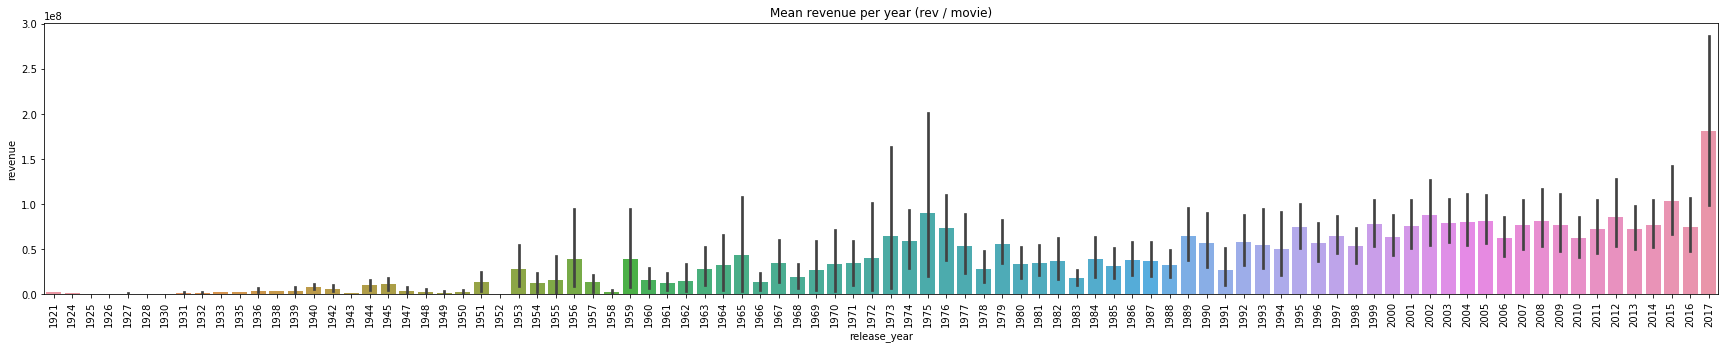

In [98]:
plt.figure(figsize=(30,5))
plt.xticks(rotation='vertical')
plt.title('Mean revenue per year (rev / movie)')
sns.barplot(x='release_year', y='revenue', data=data, estimator=np.mean)

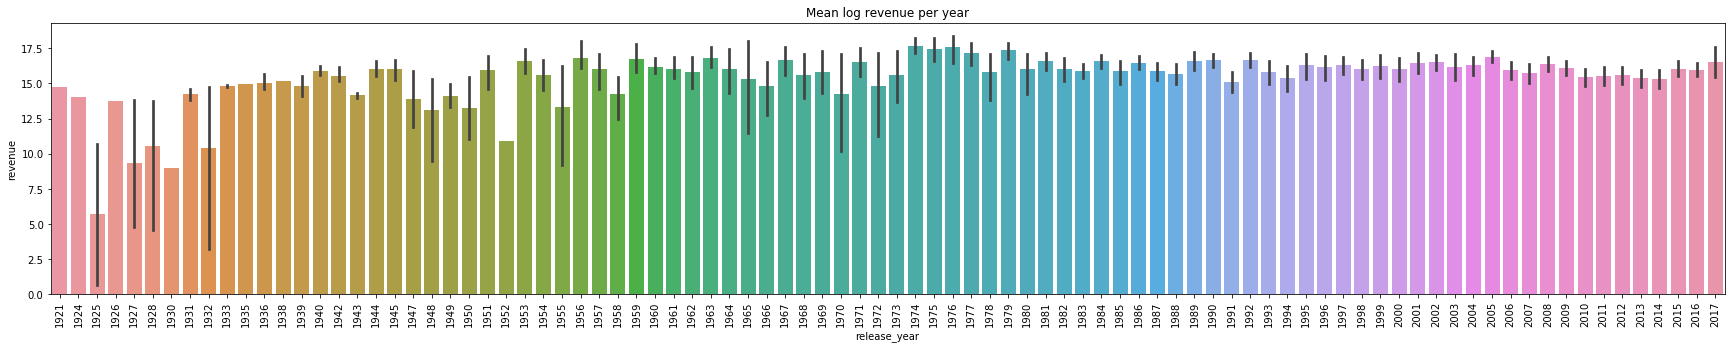

In [99]:
plt.figure(figsize=(30,5))
plt.xticks(rotation='vertical')
plt.title('Mean log revenue per year')
log_rev = np.log1p(data.revenue)
sns.barplot(x='release_year', y=log_rev, data=data, estimator=np.mean)

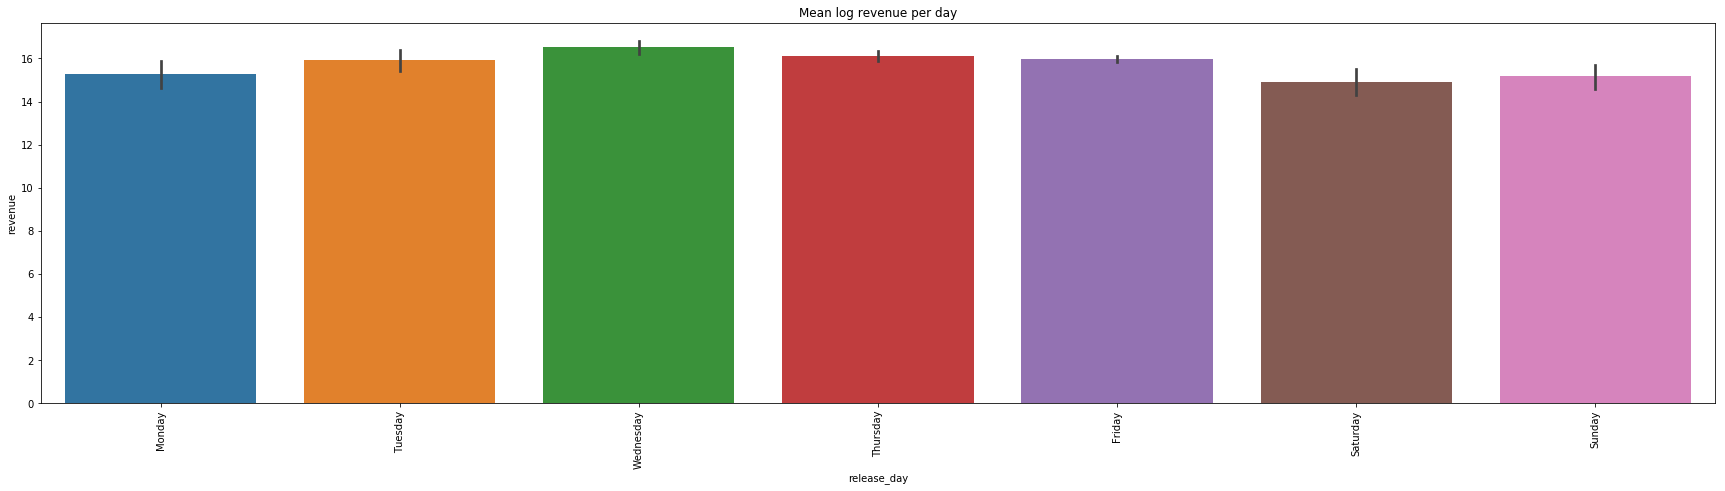

In [97]:
plt.figure(figsize=(30,7))
plt.xticks(rotation='vertical')
plt.title('Mean log revenue per day')
log_rev = np.log1p(data.revenue)
sns.barplot(x='release_day', y=log_rev, data=data, estimator=np.mean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

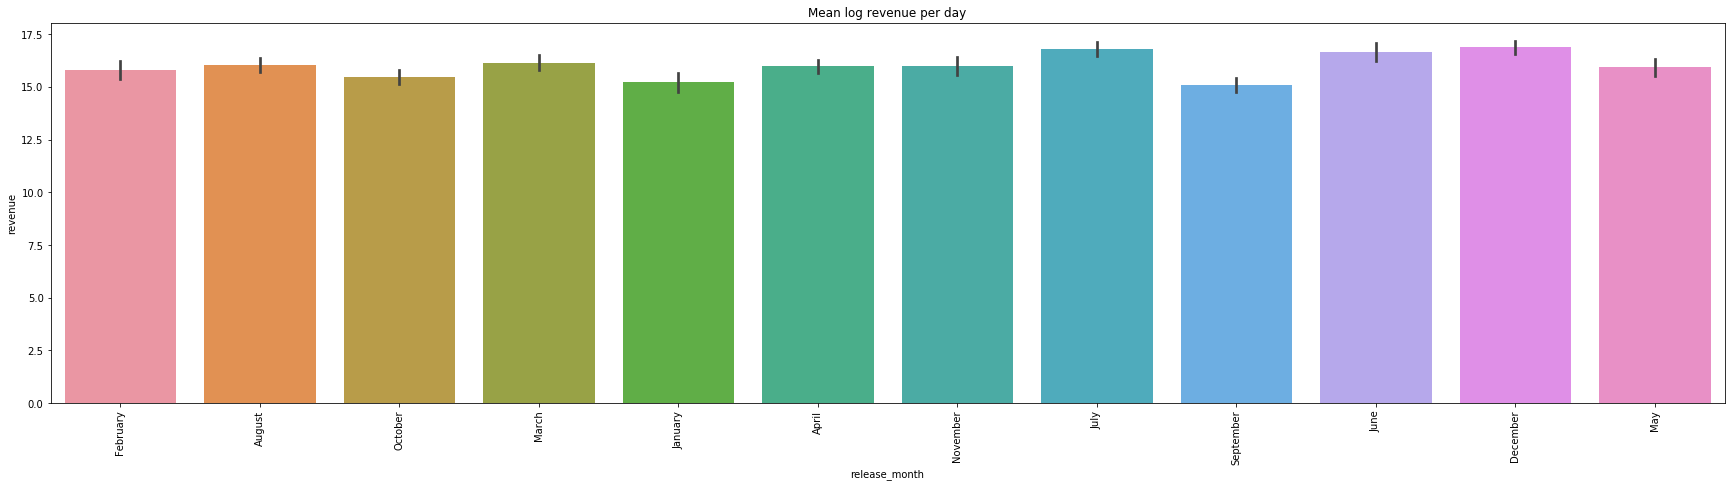

In [25]:
plt.figure(figsize=(30,7))
plt.xticks(rotation='vertical')
plt.title('Mean log revenue per day')
log_rev = np.log1p(data.revenue)
sns.barplot(x='release_month', y=log_rev, data=data, estimator=np.mean)

### Export Features

In [26]:
# Export to csv
data[['id', 'has_top_keyword']].to_csv('../data/marcel_features.csv')
